In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

In [24]:
bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0)

#read sterbefälle pro monat
sterbefälle_monat = pd.read_excel(f"Data\\sonderauswertung-sterbefaelle_groß.xlsx", sheet_name='BL_2016_2022_Monate_AG_Ins') #Datensatz ist selbst zusammengebaut
sterbefälle_monat = sterbefälle_monat[sterbefälle_monat.columns].replace(["-",".","X "],0)
print(sterbefälle_monat.loc[sterbefälle_monat["Bundesland"]=="Baden-Württemberg"][["Bundesland", "Altersgruppe", "Insgesamt"]])

            Bundesland Altersgruppe  Insgesamt
35   Baden-Württemberg    Insgesamt     118703
36   Baden-Württemberg         0-65      15768
37   Baden-Württemberg        65-75      17172
38   Baden-Württemberg        75-85      36168
39   Baden-Württemberg   85 u. mehr      49595
115  Baden-Württemberg    Insgesamt     116006
116  Baden-Württemberg         0-65      14888
117  Baden-Württemberg        65-75      15800
118  Baden-Württemberg        75-85      36901
119  Baden-Württemberg   85 u. mehr      48417
195  Baden-Württemberg    Insgesamt     111582
196  Baden-Württemberg         0-65      14999
197  Baden-Württemberg        65-75      15276
198  Baden-Württemberg        75-85      36159
199  Baden-Württemberg   85 u. mehr      45148
275  Baden-Württemberg    Insgesamt     111134
276  Baden-Württemberg         0-65      15233
277  Baden-Württemberg        65-75      15288
278  Baden-Württemberg        75-85      35858
279  Baden-Württemberg   85 u. mehr      44755
355  Baden-Wü

### Zusammenfassen der Altergruppen für Bundesländer vergleich

In [4]:
bevölkerung

,Jahr,Alter,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Gesamt
1,1990,unter 1 Jahr,119162,136550,41485,29040,6851,16629,62328,23291,83095,199981,43012,11215,49556,31411,29179,28657,911442
2,1990,1-Jährige,114672,129986,38824,31792,6552,15550,60670,25424,79748,192662,41210,10950,53584,33451,28288,30488,893851
3,1990,2-Jährige,116459,130981,39899,34300,6537,15772,60841,27284,81154,195867,42553,11180,56712,36113,28726,33405,917783
4,1990,3-Jährige,110080,124102,38900,35986,6235,14534,58403,29125,77700,188769,41173,10953,59380,37339,27379,34428,894486
5,1990,4-Jährige,109664,123680,37737,35290,6026,13868,56944,28284,76474,184442,40529,10981,58300,36631,26005,34154,879009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2020,87-Jährige,38312,43512,10243,10105,2244,5301,20549,6791,27702,62723,14619,3985,17717,9317,9953,8377,291450
2849,2020,88-Jährige,33330,38699,8576,8811,1938,4580,18106,6091,24439,55507,12764,3583,15081,8137,8488,7415,255545
2850,2020,89-Jährige,29520,33392,7694,7667,1749,4168,15998,5061,22048,49406,11429,3179,13748,7079,7715,6428,226281
2851,2020,90 Jahre und mehr,108225,122252,30029,26464,7160,17250,62984,16715,83231,184859,43862,10966,51868,24957,29586,23283,843691


### Aufteilung der Altersgruppen pro Bundesland

In [5]:
bundesland = bevölkerung.columns.values.tolist()[2:]
memory = []

for year in range(1990,2021,1):
    #Auswahl der Länder
    bevölkerungs_jahr = bevölkerung.loc[bevölkerung.Jahr== year].reset_index(drop=True)
    for land in bundesland:
        bevölkerung_kleiner_65 =  bevölkerungs_jahr[land].iloc[0:65].sum() # 0-> 64
        memory.append([year,land,(str(0)+" -< "+str(65)), bevölkerung_kleiner_65])
        bevölkerung_kleiner_75 =  bevölkerungs_jahr[land].iloc[65:75].sum() # 65-> 74
        memory.append([year,land,(str(65)+" -< "+str(75)), bevölkerung_kleiner_75])
        bevölkerung_kleiner_85 =  bevölkerungs_jahr[land].iloc[75:85].sum() # 75-> 84
        memory.append([year,land,(str(75)+" -< "+str(85)), bevölkerung_kleiner_85])
        bevölkerung_groesser_85 = bevölkerungs_jahr[land].iloc[85:91].sum() # 85> 74
        memory.append([year,land,(str(85)+"<"), bevölkerung_groesser_85])
        gesamt = bevölkerung_kleiner_65 + bevölkerung_kleiner_75 + bevölkerung_kleiner_85 + bevölkerung_groesser_85
        memory.append([year,land,"Gesamt", gesamt])

new_df = pd.DataFrame(memory, columns=["Jahr","Bundesland","Alter", "Anzahl"])
new_df

,Jahr,Bundesland,Alter,Anzahl
0,1990,Baden-Württemberg,0 -< 65,8417865
1,1990,Baden-Württemberg,65 -< 75,733976
2,1990,Baden-Württemberg,75 -< 85,537443
3,1990,Baden-Württemberg,85<,132743
4,1990,Baden-Württemberg,Gesamt,9822027
...,...,...,...,...
2630,2020,Gesamt,0 -< 65,64883395
2631,2020,Gesamt,65 -< 75,8867174
2632,2020,Gesamt,75 -< 85,6898530
2633,2020,Gesamt,85<,2505932


### Rohe Sterberate

In [6]:
new_df_2020 = new_df.loc[new_df["Jahr"]==2020]
new_df_2020_gesamt = new_df_2020.loc[new_df["Alter"]=="Gesamt"]
new_df_2020_gesamt = new_df_2020_gesamt[:-1]
new_df_2020_gesamt

,Jahr,Bundesland,Alter,Anzahl
2554,2020,Baden-Württemberg,Gesamt,11103043
2559,2020,Bayern,Gesamt,13140183
2564,2020,Berlin,Gesamt,3664088
2569,2020,Brandenburg,Gesamt,2531071
2574,2020,Bremen,Gesamt,680130
2579,2020,Hamburg,Gesamt,1852478
2584,2020,Hessen,Gesamt,6293154
2589,2020,Mecklenburg-Vorpommern,Gesamt,1610774
2594,2020,Niedersachsen,Gesamt,8003421
2599,2020,Nordrhein-Westfalen,Gesamt,17925570


In [7]:
#print(sterbefälle_monat)
sterbefälle_monat_2020 = sterbefälle_monat.loc[(sterbefälle_monat["Jahr"]==2020) & (sterbefälle_monat["Altersgruppe"]=="Insgesamt")][["Insgesamt", "Bundesland"]].sort_values("Bundesland")
sterbefälle_monat_2020
new_df_2020_gesamt["Todesfaelle"] = sterbefälle_monat_2020["Insgesamt"].to_list()
new_df_2020_gesamt["Rohe_Sterberate"] = (new_df_2020_gesamt["Todesfaelle"]/new_df_2020_gesamt["Anzahl"]) * 100000
new_df_2020_gesamt["delta_zu_gesamtsterberate"] = (new_df_2020_gesamt["Rohe_Sterberate"]) - 1185.2223348940
new_df_2020_gesamt




,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
2554,2020,Baden-Württemberg,Gesamt,11103043,116006,1044.812670,-140.409665
2559,2020,Bayern,Gesamt,13140183,143367,1091.057864,-94.164471
2564,2020,Berlin,Gesamt,3664088,37642,1027.322488,-157.899847
2569,2020,Brandenburg,Gesamt,2531071,34633,1368.314046,183.091711
2574,2020,Bremen,Gesamt,680130,8151,1198.447356,13.225021
2579,2020,Hamburg,Gesamt,1852478,18308,988.297837,-196.924498
2584,2020,Hessen,Gesamt,6293154,70051,1113.130236,-72.092098
2589,2020,Mecklenburg-Vorpommern,Gesamt,1610774,21854,1356.739058,171.516723
2594,2020,Niedersachsen,Gesamt,8003421,96980,1211.731833,26.509498
2599,2020,Nordrhein-Westfalen,Gesamt,17925570,214313,1195.571466,10.349131


In [15]:
new_df_2020_gesamt = new_df_2020_gesamt.sort_values(by=["delta_zu_gesamtsterberate"])
new_df_2020_gesamt = new_df_2020_gesamt.reset_index(drop= True)
bundesland_sorted_by_delta = new_df_2020_gesamt["Bundesland"].to_list()


In [12]:
new_df_2020_gesamt = new_df_2020_gesamt[new_df_2020_gesamt.columns].replace(["Mecklenburg-Vorpommern", "Nordrhein-Westfalen", "Baden-Württemberg","Rheinland-Pfalz","Schleswig-Holstein", ],["MV", "NRW", "BaWü", "RLP","SH" ])
new_df_2020_gesamt

,Jahr,Bundesland,Alter,Anzahl,Todesfaelle,Rohe_Sterberate,delta_zu_gesamtsterberate
0,2020,Hamburg,Gesamt,1852478,18308,988.297837,-196.924498
1,2020,Berlin,Gesamt,3664088,37642,1027.322488,-157.899847
2,2020,BaWü,Gesamt,11103043,116006,1044.812670,-140.409665
3,2020,Bayern,Gesamt,13140183,143367,1091.057864,-94.164471
4,2020,Hessen,Gesamt,6293154,70051,1113.130236,-72.092098
5,2020,NRW,Gesamt,17925570,214313,1195.571466,10.349131
6,2020,Bremen,Gesamt,680130,8151,1198.447356,13.225021
7,2020,RLP,Gesamt,4098391,49169,1199.714717,14.492382
8,2020,SH,Gesamt,2910875,35192,1208.983553,23.761218
9,2020,Niedersachsen,Gesamt,8003421,96980,1211.731833,26.509498


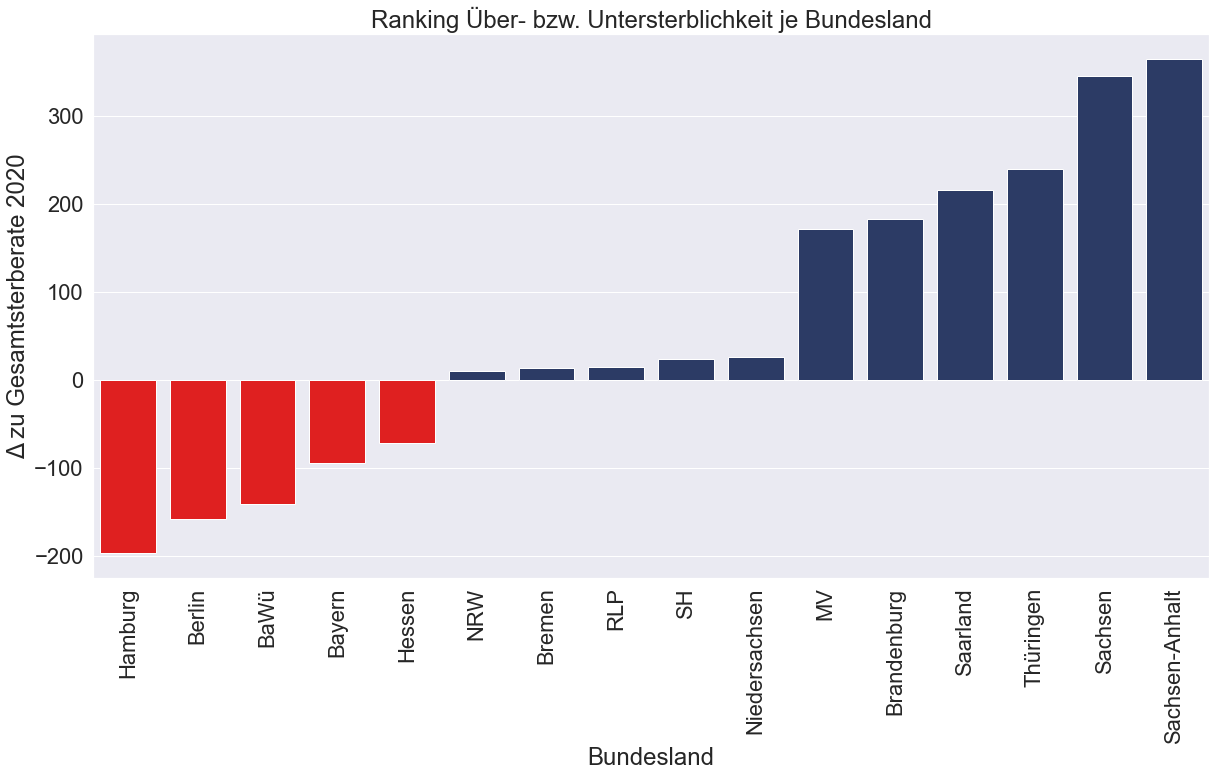

In [16]:
clrs = ['red' if y<=0 else hs_blau for y in new_df_2020_gesamt.delta_zu_gesamtsterberate]


barplot_todesfaelle_sorted = sns.barplot(data = new_df_2020_gesamt, x= new_df_2020_gesamt.Bundesland, y = new_df_2020_gesamt.delta_zu_gesamtsterberate, order= bundesland_sorted_by_delta,  palette=clrs)
sns.set(font_scale=2)



barplot_todesfaelle_sorted.set_ylabel("Δ zu Gesamtsterberate 2020")

barplot_todesfaelle_sorted.set_title("Ranking Über- bzw. Untersterblichkeit je Bundesland")
barplot_todesfaelle_sorted.set_xticklabels(barplot_todesfaelle_sorted.get_xticklabels(),rotation = 90)

plt.gcf().set_size_inches(20, 10)